# Linear Regression

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

import statsmodels.api as sm
from sklearn import datasets
from sklearn.datasets import make_regression

from scipy import stats as stats
from scipy.stats import chi2
from scipy.stats import t

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Contents of this note
## 1. Boston house price data
## 2. Distribution of Least Square Estimator
### - (1) The expression of the Least Squared Estimator
### - (2) The distribution of the Least Squared Estimator
### - (3) Unbiased estimator of the variance
### - (4) Simulation Analysis
## 3. T test for linear regression models
### - (1) The distribution of the test statistic
### - (2) Test about the relationship between coefficients
### - (3) Multiple Hypothesis Testing

# Part 1 - Boston house price data
## In this notebook, let's use the [Boston house price data](https://scikit-learn.org/0.19/modules/generated/sklearn.datasets.load_boston.html).
- ### Each record in the database describes a Boston suburb or town. 
- ### The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 

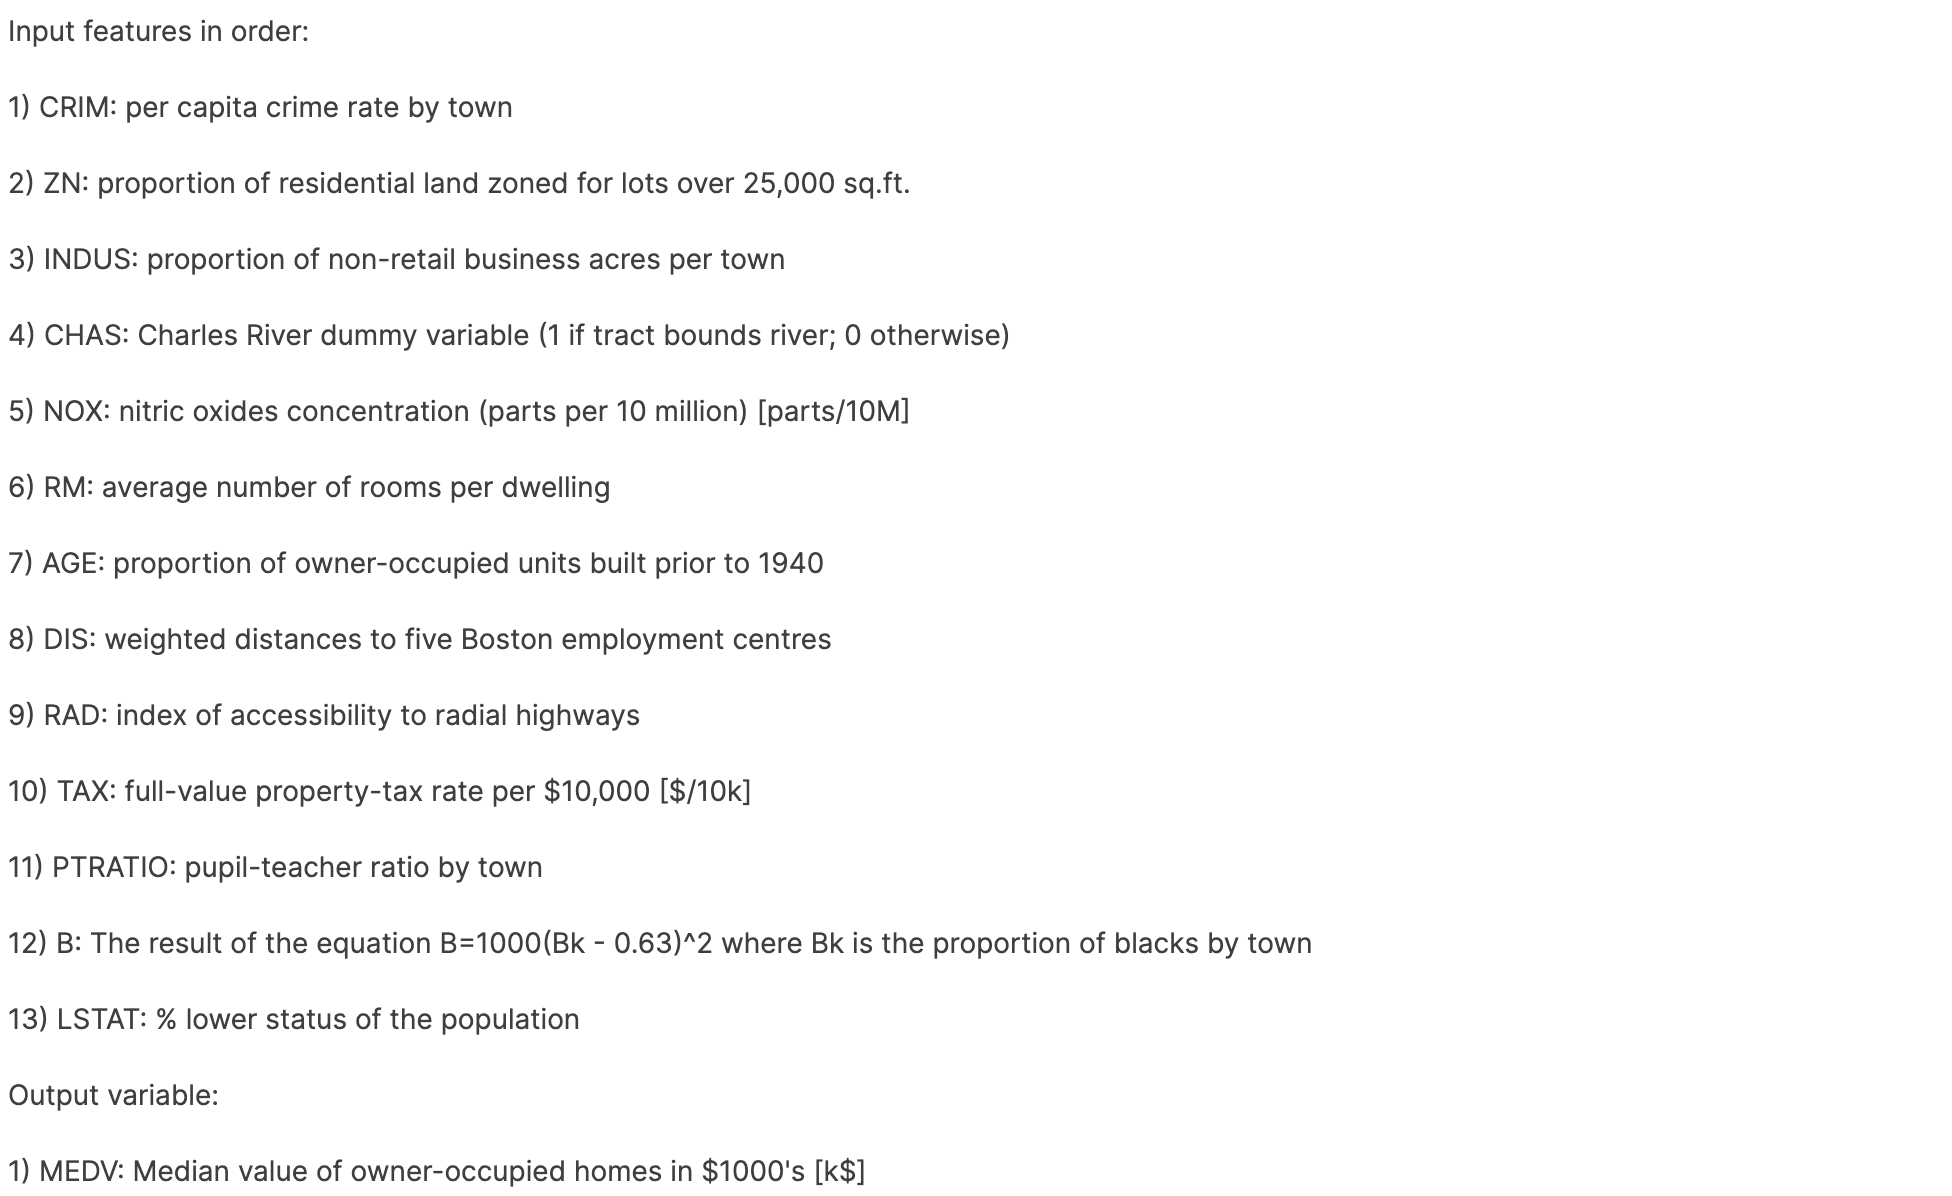

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston         = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston['CONSTANT'] = 1
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CONSTANT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


### A quick linear univariate regression model (not necessarily a good one)
### MEDV = a + b * RM 

In [3]:
X = boston[['CONSTANT','RM']]
Y = boston['MEDV']

### The scatter plot below shows the joint distribution of RM and MEDV. (The plot shows that the MEDV variable is truncated at 50.) 

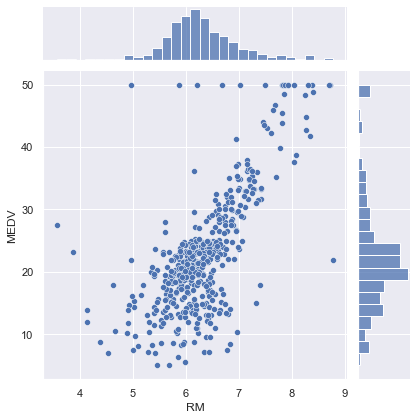

In [4]:
reg_data = boston.copy()
sns.jointplot(reg_data['RM'],reg_data['MEDV'])
plt.show()

In [5]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.49e-74
Time:                        00:57:13   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT     -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Part 2 - Distribution of Least Square Estimator
## (1) The expression of the Least Squared Estimator

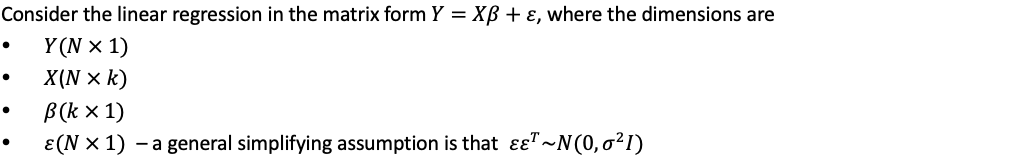

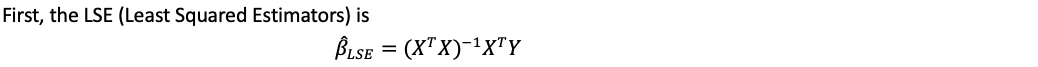

### [See derivation here](https://github.com/houzhj/Statistics/blob/main/math/03_linear_regression_derivation_01.pdf)

## (2) The distribution of the Least Squared Estimator

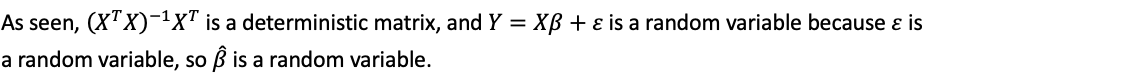

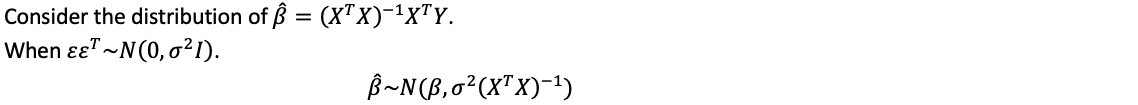

### [See derivation here](https://github.com/houzhj/Statistics/blob/main/math/03_linear_regression_derivation_02.pdf)

## (3) An unbiased estimator of the variance

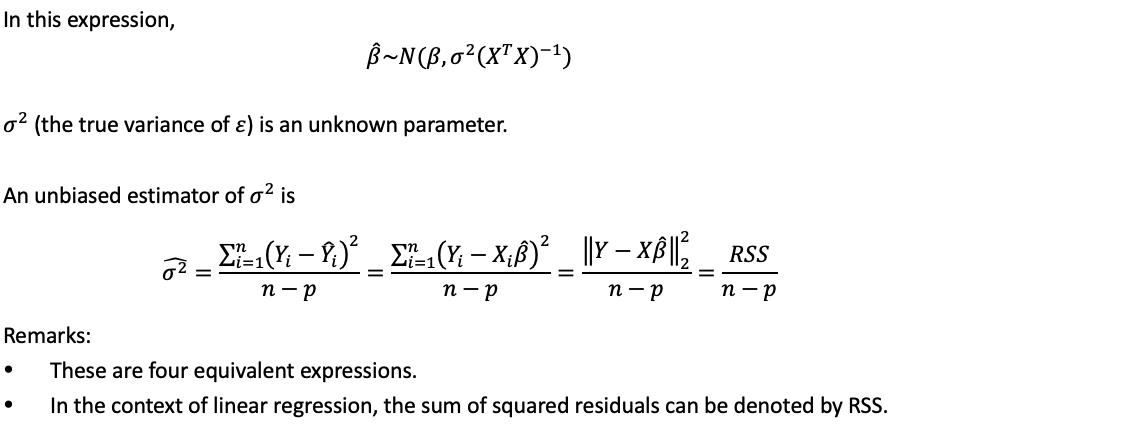

### [See derivation here](https://github.com/houzhj/Statistics/blob/main/math/03_linear_regression_derivation_03.pdf)

## (4) Simulation Analysis

### There are two methods to obtain the results of the estimation. 
- #### (1) using the calculation shown above
- #### (2) using the OLS() function in statsmodels. 

We can show that these two methods create the same results.
### Method 1:  Using Matrix Calculation:

In [6]:
X = boston[['CONSTANT','RM']]
Y = boston['MEDV']

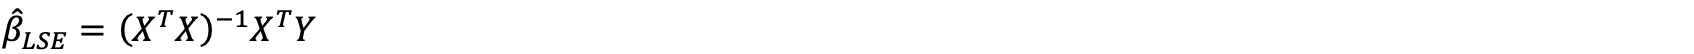

In [7]:
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
beta

array([-34.67062078,   9.10210898])

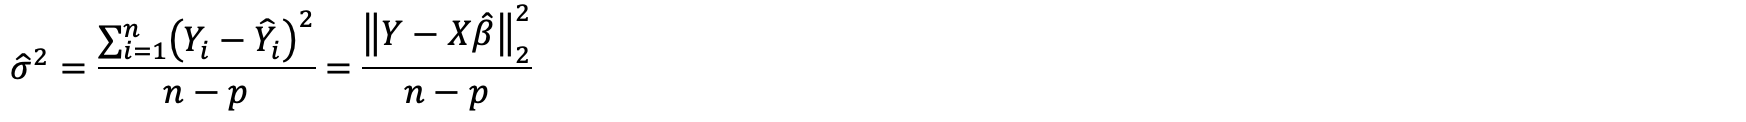

In [8]:
residual   = Y - np.dot(X,beta)
RSS        = np.dot(residual,residual)
sigma2_hat = RSS/(len(Y)-len(beta))
sigma2_hat

43.77356983375356

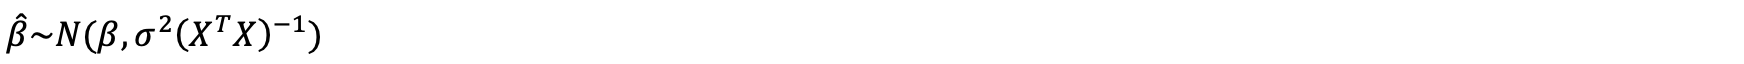

In [9]:
### Variance-Covariance Matrix of beta
beta_var = sigma2_hat*np.linalg.inv(np.dot(X.T,X))
beta_var

array([[ 7.0214559 , -1.10347658],
       [-1.10347658,  0.17558326]])

In [10]:
### Standard Error of beta - sqrt(diagonal element of the Variance-Covariance Matrix)
beta_sd = np.sqrt([beta_var[0][0],beta_var[1][1]])
beta_sd

array([2.64980299, 0.41902656])

### Method 2: Using OLS( ) function in statsmodels
#### [statsmodels.regression.linear_model.OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)

#### [statsmodels.regression.linear_model.OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults)

In [11]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.49e-74
Time:                        00:57:13   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT     -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### comparing the results

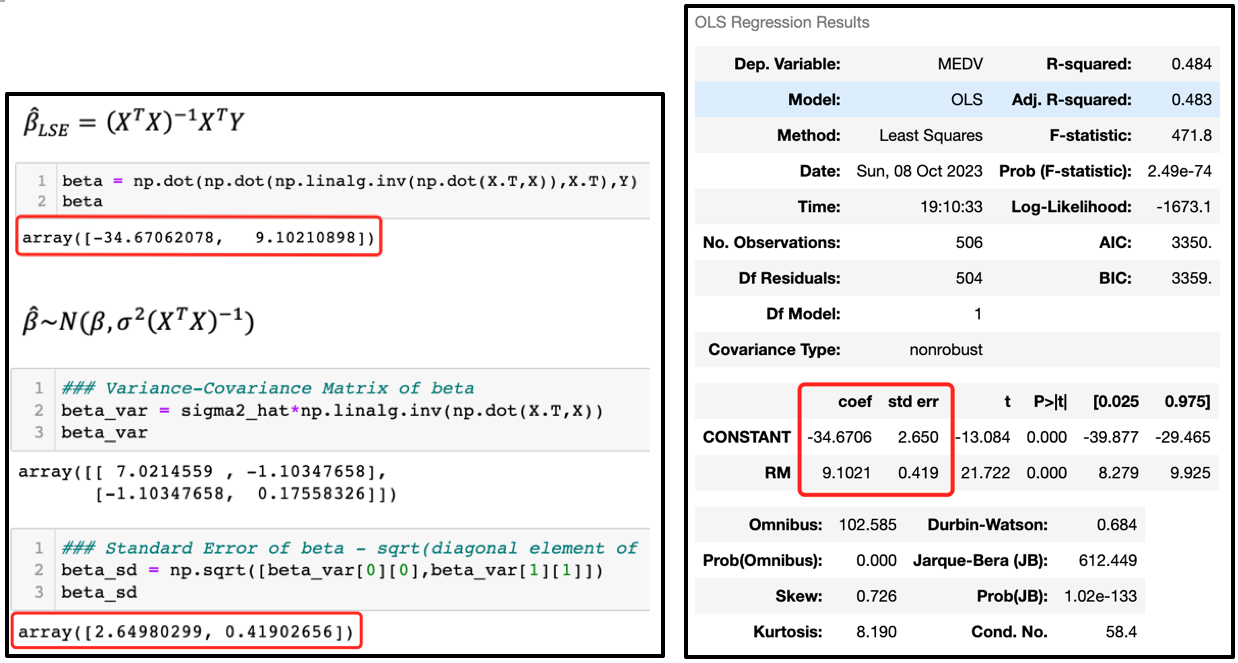

**It can be seen that the two methods return the same numbers (estimate and standard error of beta). Going forward in this analysis, we use the [statsmodels.regression.linear_model.OLS]((https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)) function.**

### The code below calculate the standard error using bootstrap, in the following steps:
- #### Step 1: Fit an OLS model using the original data X and Y
- #### Step 2: Obtain the residual series and the predicted Y (i.e., X*beta) from the model.
- #### Step 3: Create a new Y data ( = predicted Y + a random shuffle of the residuals). Refit the model and obtain a new estimation of parameters. 
- #### Step 4: Repeat Step 3 many times, get bootstrapped estimations. 

In [12]:
def ols_boostrap(X,Y,n_bootstrap):
    k        = X.shape[1]
    model    = sm.OLS(Y, X).fit()
    residual = model.resid
    pred_y   = model.predict()
    est_bootstrap = pd.DataFrame(columns=['beta'+str(i) for i in range(k)])
    for b in tqdm(range(n_bootstrap)):
        Y_now     = pred_y + residual.sample(frac=1,ignore_index=True)
        model_now = sm.OLS(Y_now, X).fit()
        est_bootstrap.loc[b,:] = list(model_now.params)
    return(est_bootstrap)

In [13]:
bootstrapped_est = ols_boostrap(X,Y,1000)

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 616.41it/s]


In [14]:
bootstrapped_est

,beta0,beta1
0,-35.09569,9.169745
1,-37.245355,9.511796
2,-35.87126,9.293153
3,-35.200652,9.186447
4,-31.771898,8.640869
...,...,...
995,-32.978309,8.832831
996,-38.117312,9.650541
997,-37.508871,9.553726
998,-33.438124,8.905996


In [15]:
###### Bootstrap-based SE of beta0 and beta1
bootstrapped_est[['beta0','beta1']].std()

beta0    2.591672
beta1    0.412382
dtype: float64

In [16]:
###### Theoretical SE of beta0 and beta1
sm.OLS(Y, X).fit().bse

CONSTANT    2.649803
RM          0.419027
dtype: float64

### The code below investigate the impact of the sample size "n" on the coefficients "beta"
- **1000 experiments are conducted for different sample sizes.**
- **In each of the experiments, a sample is randomly selected from the original datasets, and a regression model is estimated using this sample.**
- **The distributions of the coefficient (of beta1) using different sample sizes  are compared.**

In [17]:
def regression_sim(data,sample_size,n_experiment=1000):
    result = pd.DataFrame(columns=['beta0_est','beta0_se','beta0_p',
                                   'beta1_est','beta1_se','beta1_p',
                                   'sample_size'])
    reg_data = data
    for e in range(n_experiment):
        sample_all = reg_data.sample(sample_size)
        X = sample_all[['CONSTANT','RM']]
        Y = sample_all['MEDV']
        model  = sm.OLS(Y, X).fit()
        #print(model.summary())
        est    = model.params
        se     = model.bse
        pvalue = model.pvalues
        result.loc[e,'beta0_est'] = est[0]
        result.loc[e,'beta1_est'] = est[1]
        result.loc[e,'beta0_se']  = se[0]
        result.loc[e,'beta1_se']  = se[1]
        result.loc[e,'beta0_p']   = pvalue[0]
        result.loc[e,'beta1_p']   = pvalue[1]
    result['sample_size'] = sample_size
    return(result)

In [18]:
sample_size_list = [100,200,400]
for ss in sample_size_list:
    result_now = regression_sim(reg_data,ss)
    if ss == sample_size_list[0]:
        result_df = result_now
    else:
        result_df = pd.concat([result_df,result_now], axis=0,ignore_index=True)

In [19]:
result_df.groupby(['sample_size'])['beta1_est'].agg(['mean','var']).reset_index()

,sample_size,mean,var
0,100,9.160015,1.785377
1,200,9.125166,0.720781
2,400,9.103265,0.118651


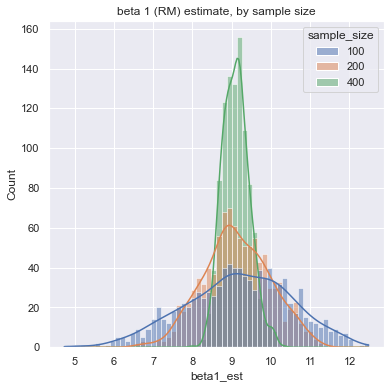

In [20]:
plt.figure(figsize=(6,6))
sns.histplot(data=result_df,x='beta1_est',hue='sample_size',palette='deep',kde=True)
plt.title('beta 1 (RM) estimate, by sample size')
plt.show()

# Part 3 - T-test for Linear Regression

## (1) The distribution of the test statistic

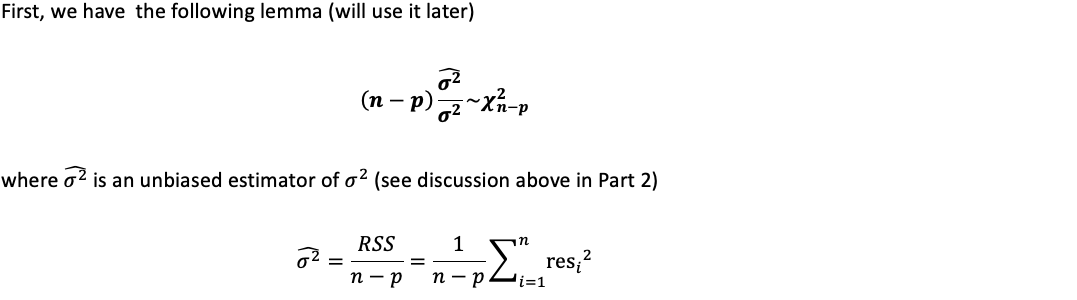

### [See proof of the lemma here](https://github.com/houzhj/Statistics/blob/main/math/03_linear_regression_derivation_04.pdf)

**The code below calculate this statistic using simulated data. **
**The RSS/(n-p) can be calculated by two ways. Will use (1) going forward**

In [21]:
X     = boston[['CONSTANT','RM']]
Y     = boston['MEDV']
model = sm.OLS(Y, X).fit()

In [22]:
###### (1) mse_resid function in linear_model.OLSResults
model.mse_resid

43.773569833753584

In [23]:
###### (2) calculation by definition
beta       = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
residual   = Y - np.dot(X,beta)
RSS        = np.dot(residual,residual)
sigma2_hat = RSS/(len(Y)-len(beta))
sigma2_hat

43.77356983375356

### Transfer the codes above to a funtion. The following codes calculate the ratio between the unbiased estimator of sigma2 and the true sigma2 with a given sample size. The distributions of X and error term (e) are fixed. 
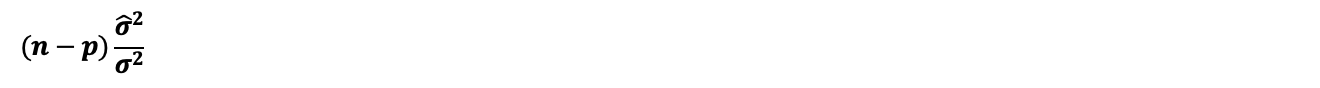

In [24]:
def calc_ratio(sample_size):
    x_mu     = 10
    x_sigma2 = 6
    e_mu     = 0
    e_sigma2 = 2
    n        = sample_size
    a        = 2
    b        = 3
    data     = pd.DataFrame(columns=['constant','x','e','y'])

    x        = np.random.normal(x_mu,np.sqrt(x_sigma2),n)
    e        = np.random.normal(e_mu,np.sqrt(e_sigma2),n)
    y        = a + b*x + e

    data['constant'] = [1]*n
    data['x'] = x
    data['e'] = e
    data['y'] = y

    X = data[['constant','x']]
    Y = data['y']
    
    model = sm.OLS(Y, X).fit()
    a = model.mse_resid*(len(Y)-X.shape[1])
    b = e_sigma2
    return(a/b)

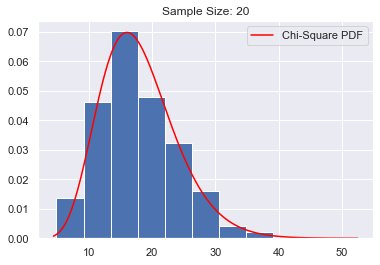

In [25]:
sample_size  = 20
n_experiment = 1000
ratio_result = [np.nan]*n_experiment
for e in range(n_experiment):
    ratio_result[e] = calc_ratio(sample_size)
plt.hist(ratio_result,density=True)
x = np.linspace(np.min(ratio_result)*0.9, np.max(ratio_result)*1.1, 400)
pdf = chi2.pdf(x, df=sample_size-2)
plt.plot(x, pdf, color='red', label='Chi-Square PDF')
plt.legend()
plt.title('Sample Size: 20')
plt.show()

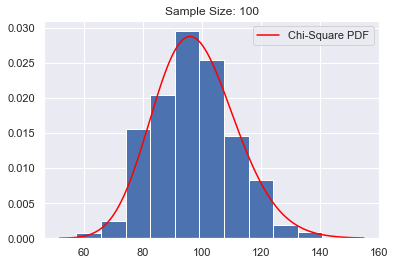

In [26]:
sample_size  = 100
n_experiment = 1000
ratio_result = [np.nan]*n_experiment
for e in range(n_experiment):
    ratio_result[e] = calc_ratio(sample_size)
plt.hist(ratio_result,density=True)
x = np.linspace(np.min(ratio_result)*0.9, np.max(ratio_result)*1.1, 400)
pdf = chi2.pdf(x, df=sample_size-2)
plt.plot(x, pdf, color='red', label='Chi-Square PDF')
plt.legend()
plt.title('Sample Size: 100')
plt.show()

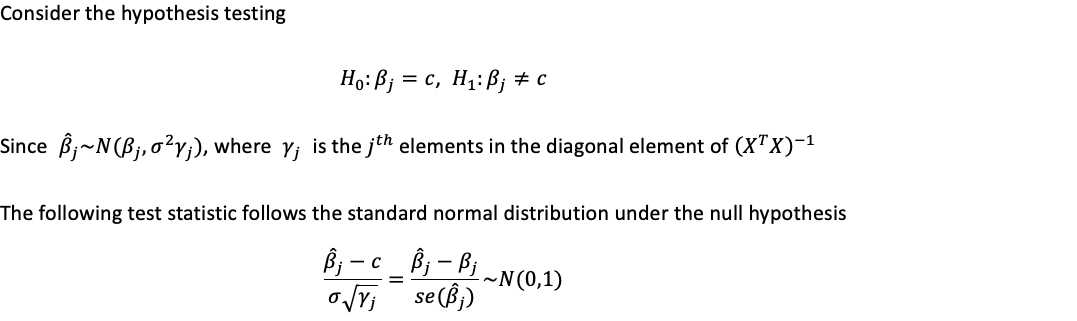

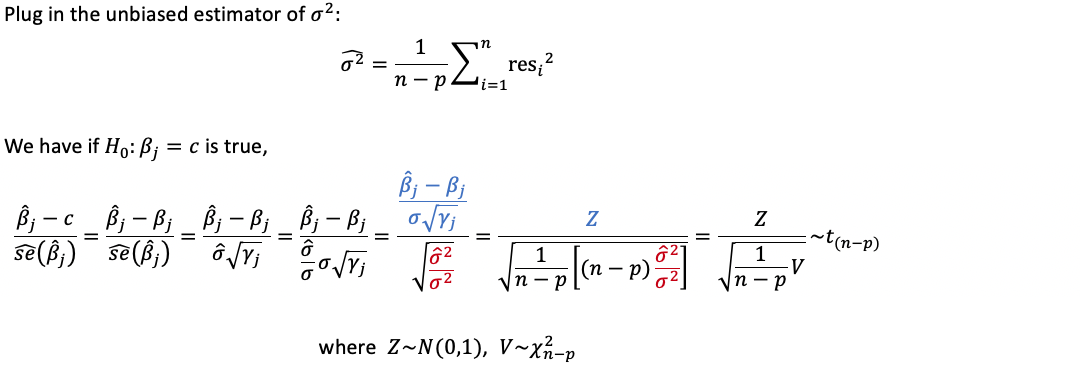

### The calculation of the t statistic is provided in [statsmodels.regression.linear_model.OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults). 

In [27]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.49e-74
Time:                        00:57:33   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT     -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Use "coef"/"std err" to calculate "t"
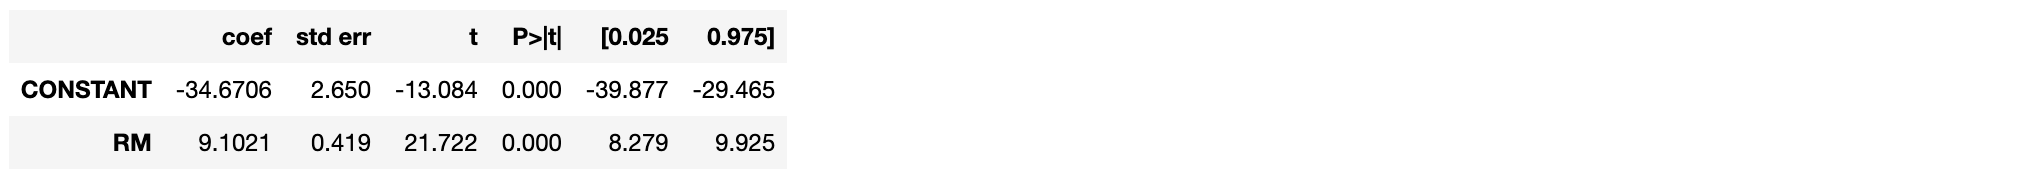

In [28]:
print(-34.6706/2.65)
print(9.1021/0.419)

-13.083245283018869
21.723389021479715


## (2) Test about the relationship between coefficients

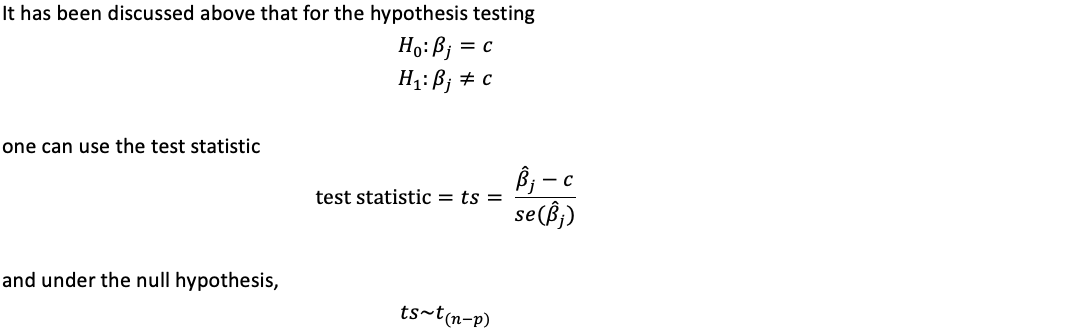

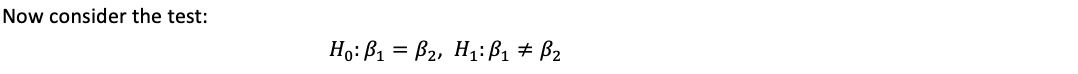

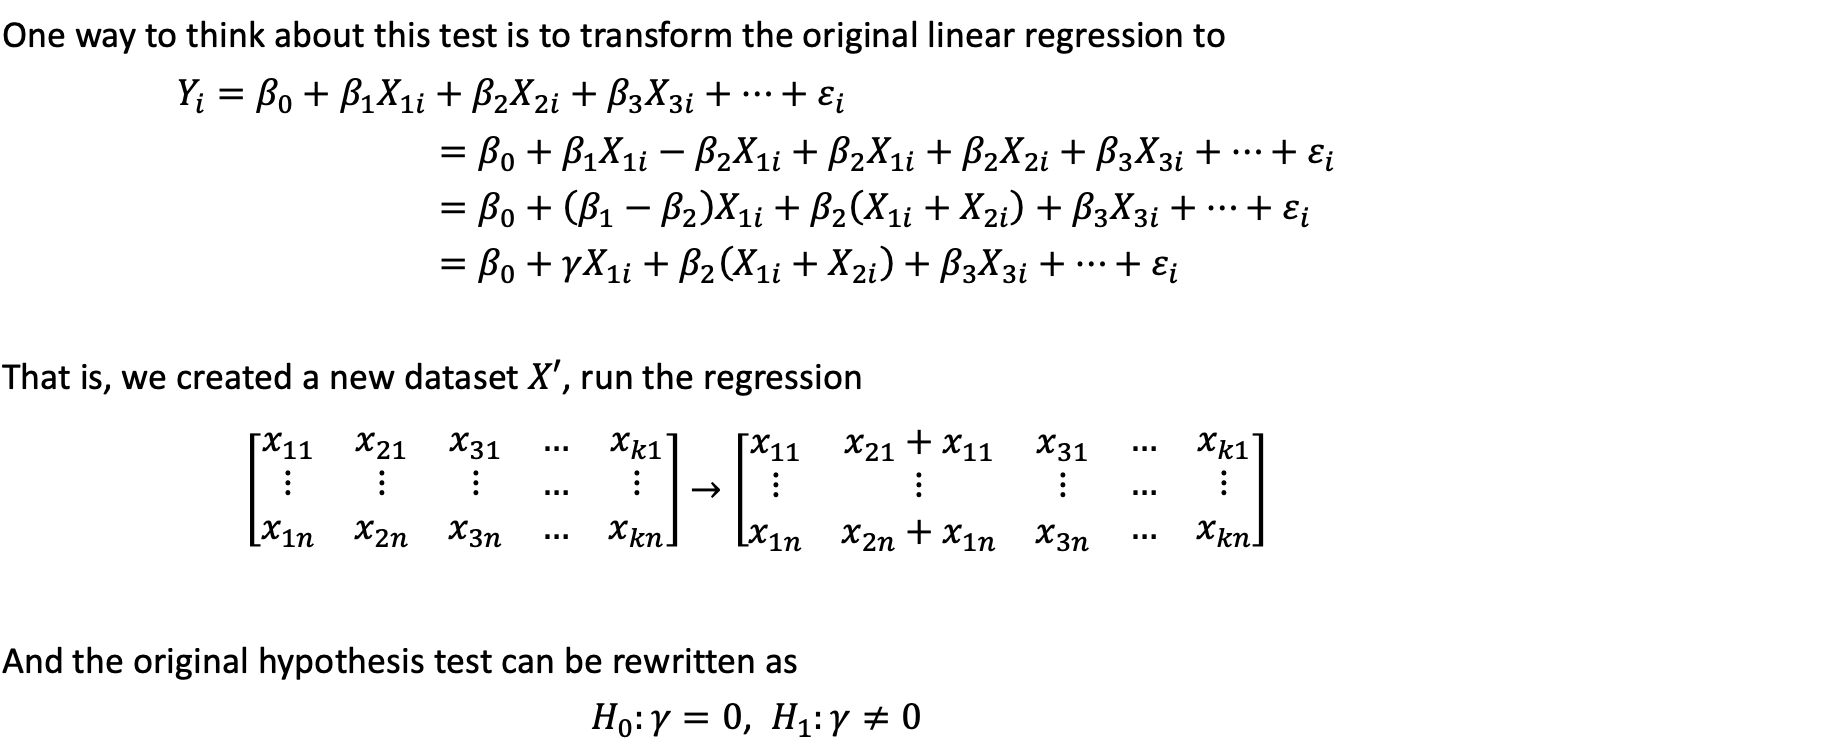

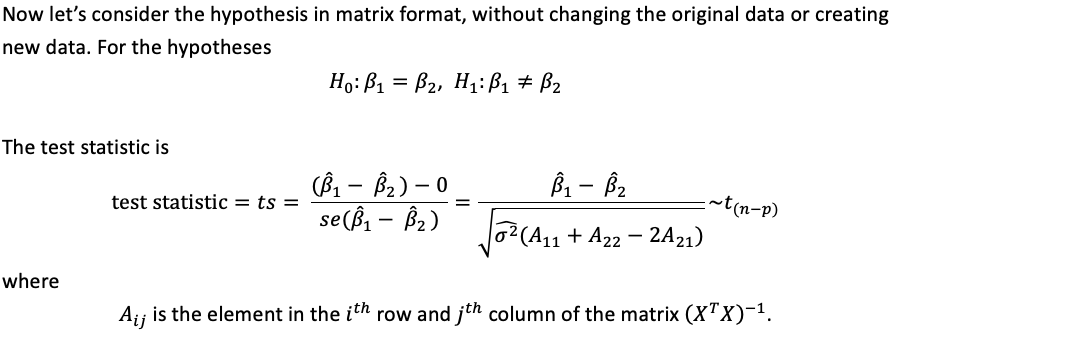

### [See derivation here](https://github.com/houzhj/Statistics/blob/main/math/03_linear_regression_derivation_05.pdf)

## (3) Multiple Hypothesis Testing

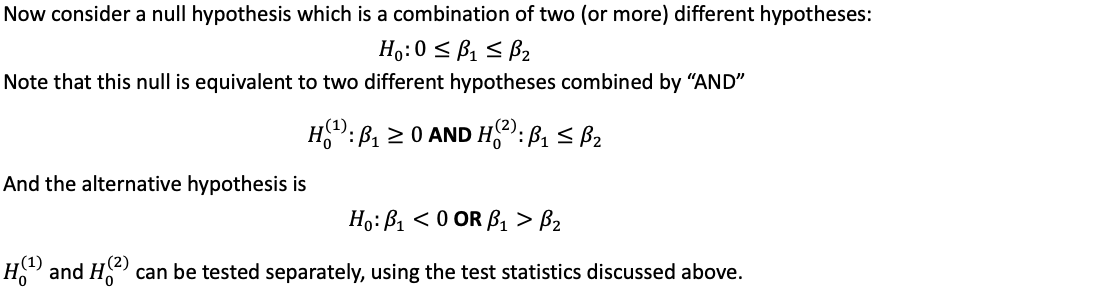

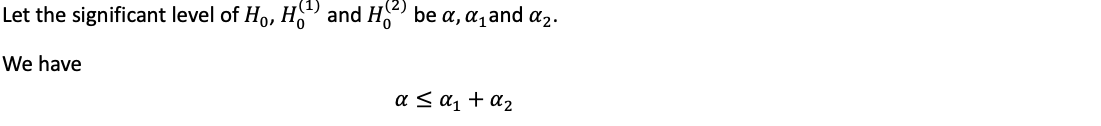

### [See proof here](https://github.com/houzhj/Statistics/blob/main/math/03_linear_regression_derivation_06.pdf)

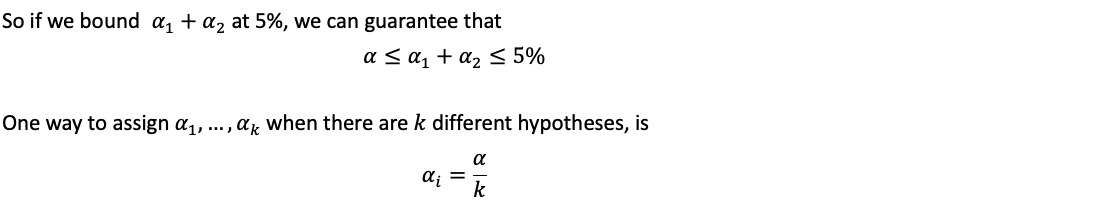

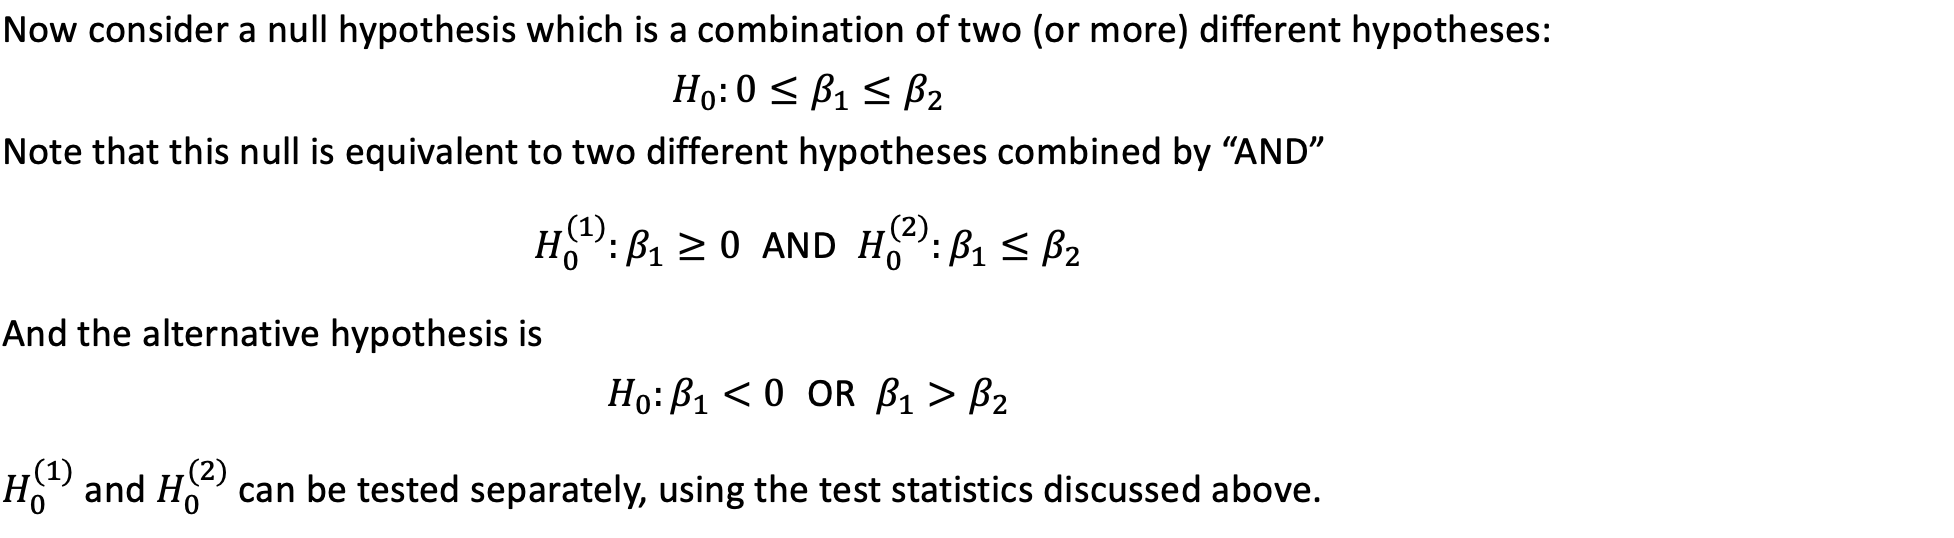

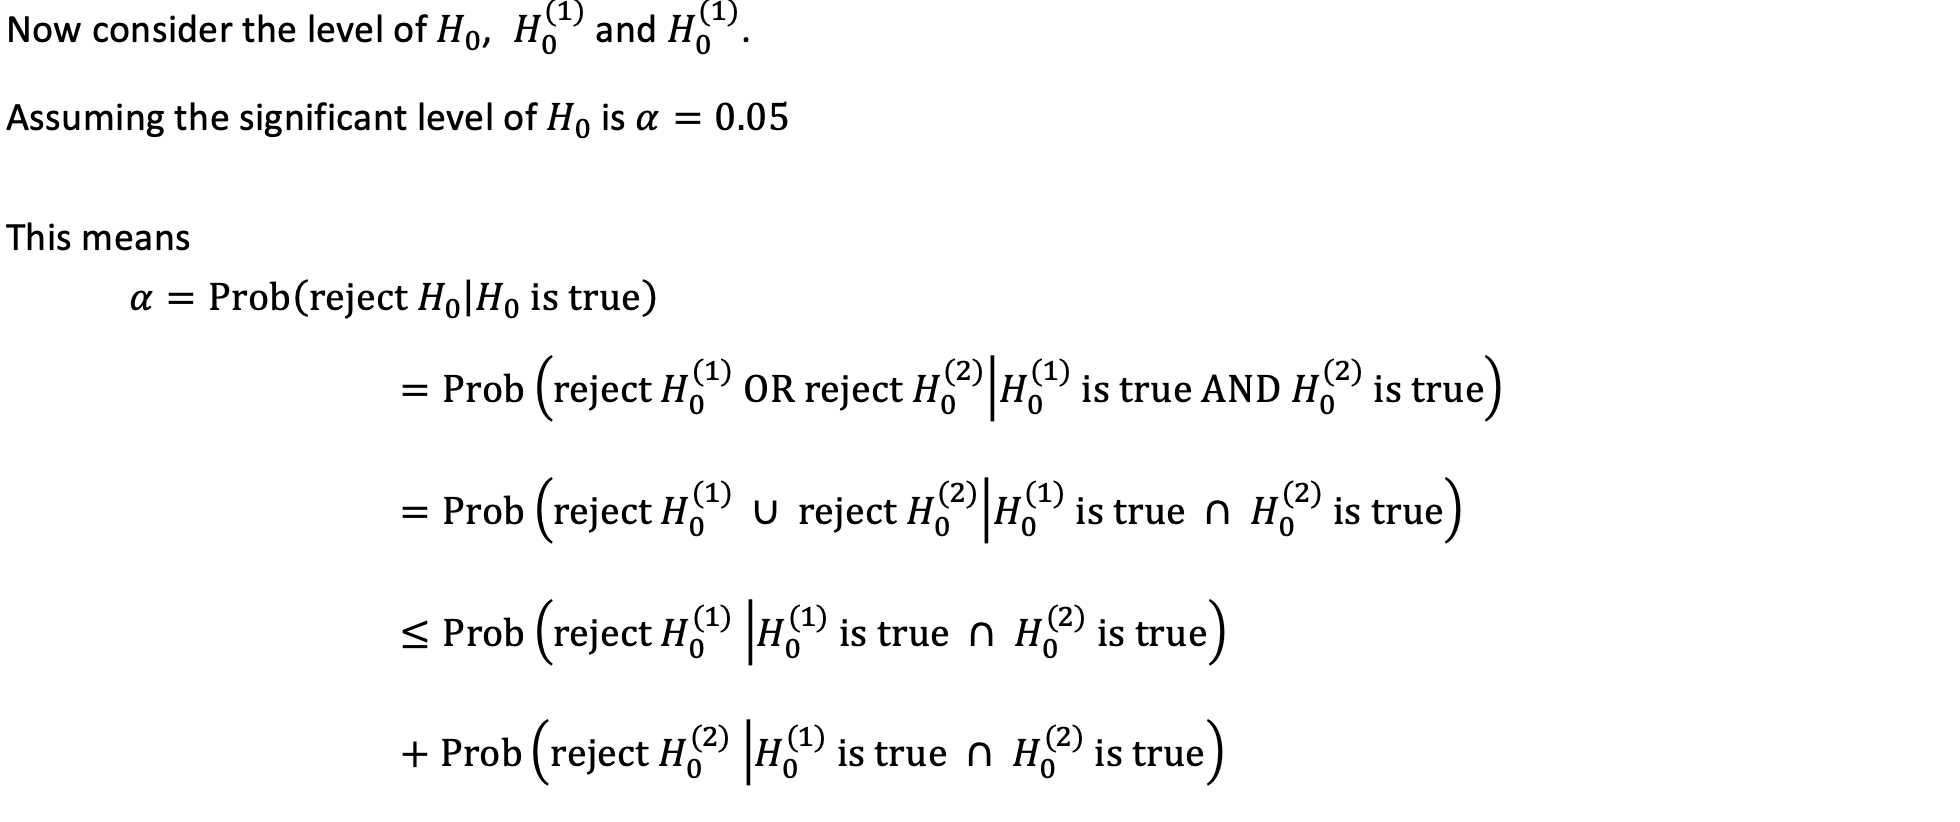

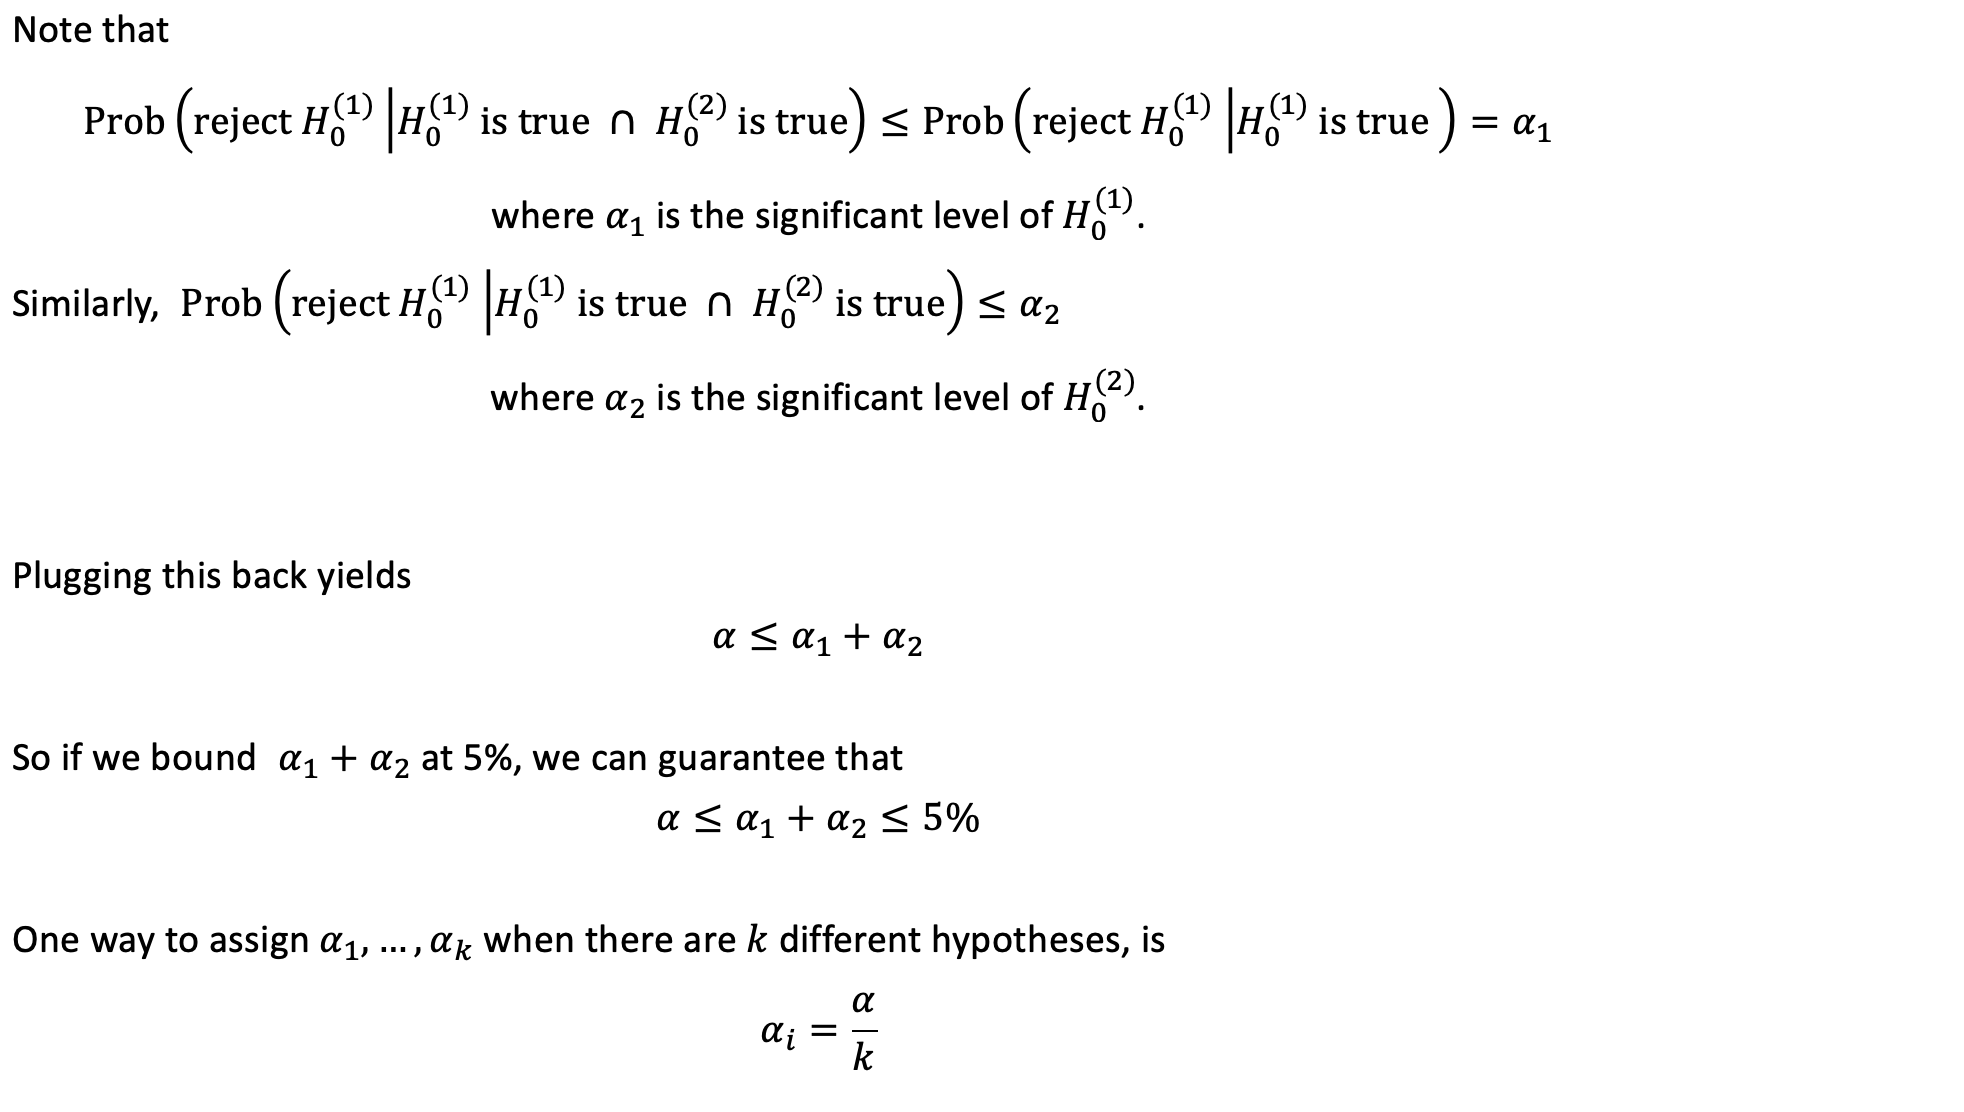

## Example using simulated data

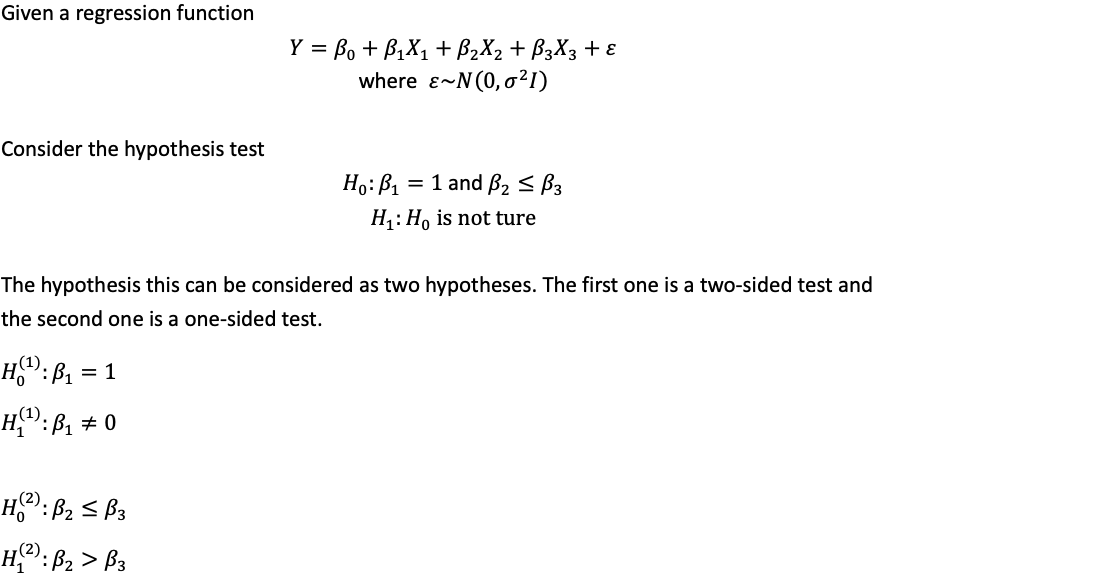

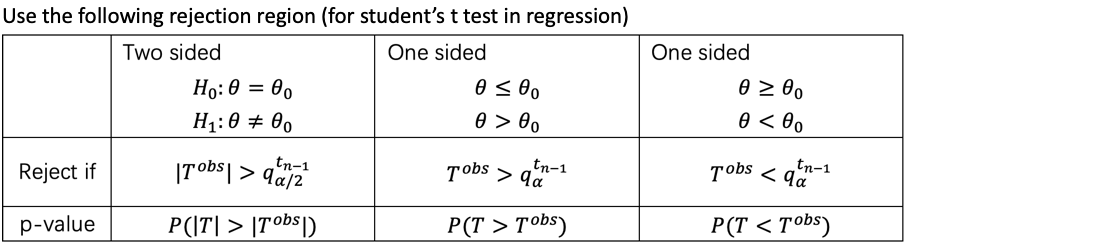

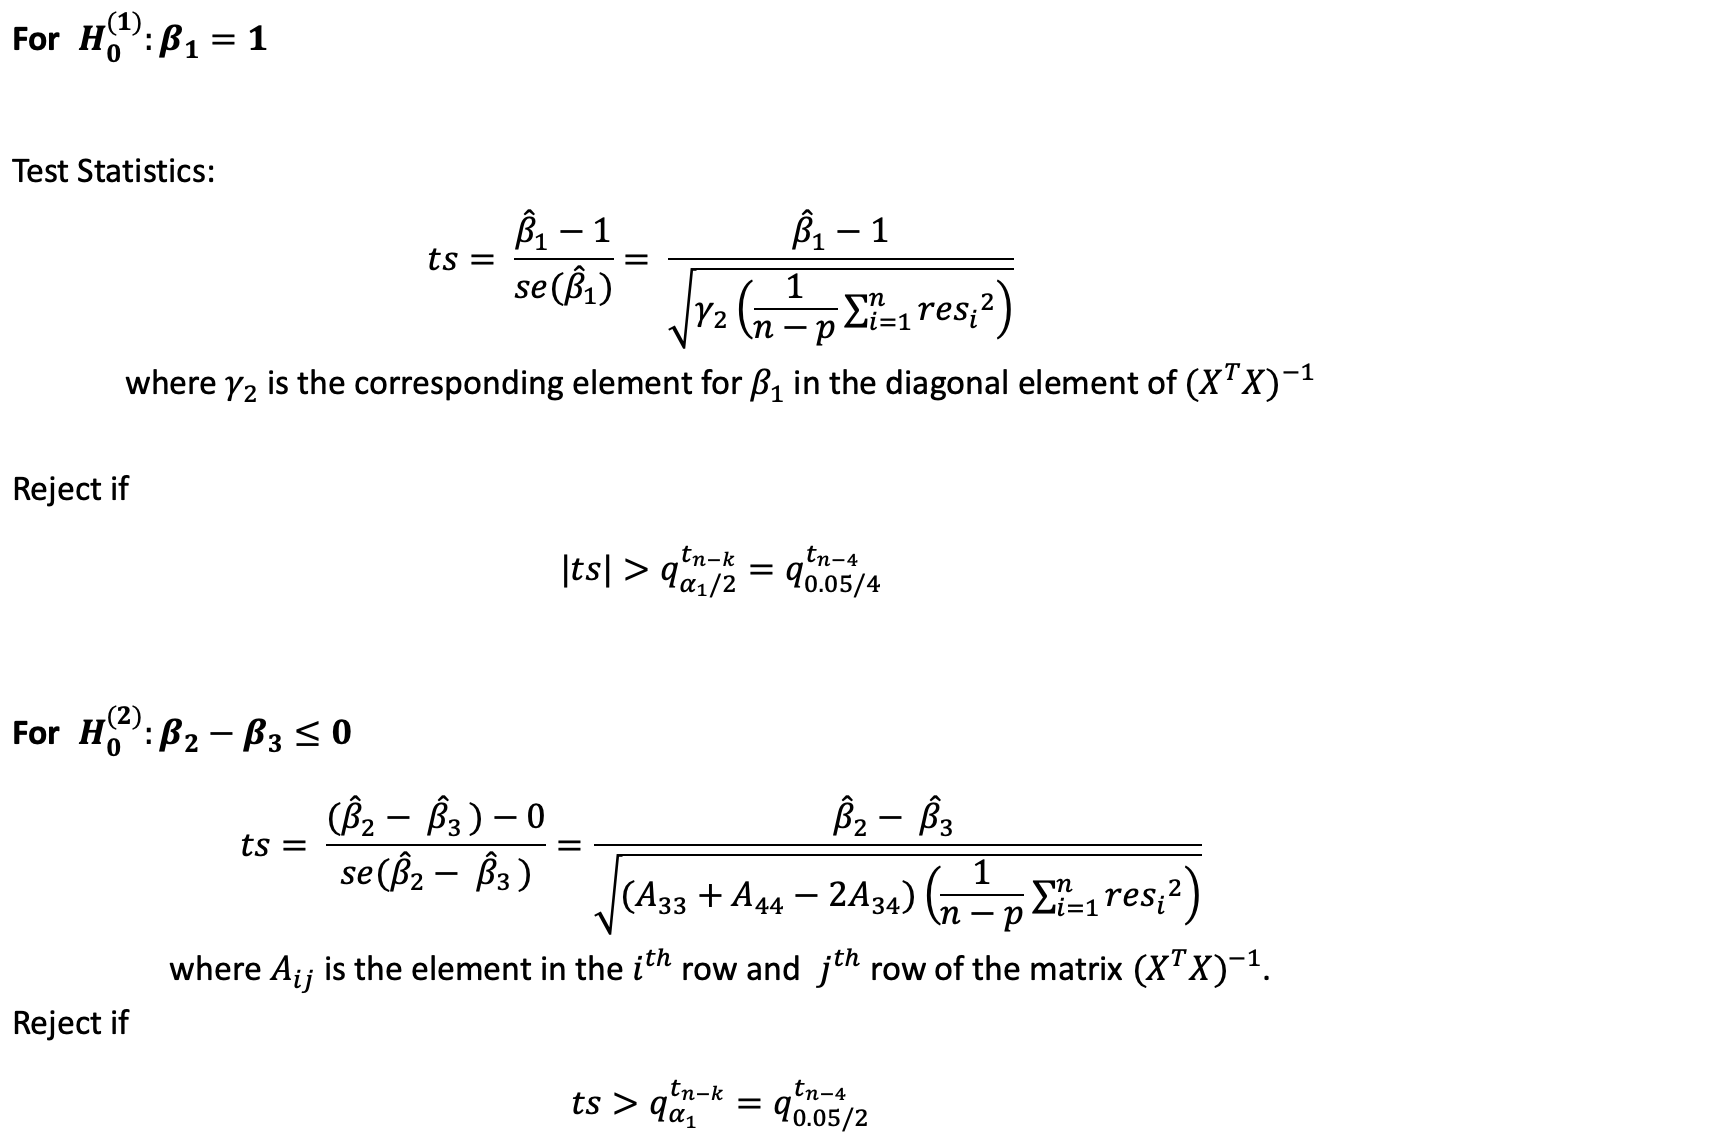

### The following codes is a function that conduct a multiple testing, given
- **the actual values of the coeffcients (which are used for data generation).**
- **the sample size**
- **weight - the overall level is defined as a weighted average of alpha_1 and alpha_2. This parameter specifies the weights. **

### The function returns
- **(1) test statistic for each of the two sub-hypotheses**
- **(2) "reject" or "do not reject" decision for each of the two sub-null-hypotheses**
- **(3) "reject" or "do not reject" decision for the combined null hypothesis.**

In [29]:
def multiple_test(sample_size,beta0,beta1,beta2,beta3,alpha,weight):
    ##### Data Generation 
    x1_mu     = 10
    x1_sigma2 = 6
    x2_mu     = 5
    x2_sigma2 = 2
    x3_mu     = 8
    x3_sigma2 = 1
    e_mu      = 0
    e_sigma2  = 2
    n         = sample_size
    data      = pd.DataFrame(columns=['constant','x1','x2','x3','e','y'])

    x1        = np.random.normal(x1_mu,np.sqrt(x1_sigma2),n)
    x2        = np.random.normal(x2_mu,np.sqrt(x2_sigma2),n)
    x3        = np.random.normal(x3_mu,np.sqrt(x3_sigma2),n)
    e         = np.random.normal(e_mu,np.sqrt(e_sigma2),n)
    y         = beta0 + beta1*x1 + beta2*x2 +beta3*x3 + e

    data['constant'] = [1]*n
    data['x1'] = x1
    data['x2'] = x2
    data['x3'] = x3
    data['e'] = e
    data['y'] = y
    X = data[['constant','x1','x2','x3']]
    Y = data['y']
    k = X.shape[1]

    model = sm.OLS(Y, X).fit()
    beta = model.params
    
    matrix     = np.linalg.inv(np.dot(X.T,X))
    sigma2_hat = model.mse_resid

    ts1 = (beta[1]-1)/np.sqrt(matrix[1][1]*sigma2_hat)
    ts2 = (beta[2]-beta[3])/np.sqrt((matrix[2][2]+matrix[3][3]-2*matrix[2][3])*sigma2_hat)
    p1  = (1-stats.t.cdf(abs(ts1),df=n-k))*2
    p2  = 1-stats.t.cdf(ts2,df=n-k)
    alpha1 = alpha*weight[0]
    alpha2 = alpha*weight[1]
    
    reject1 = int(p1<alpha1)
    reject2 = int(p2<alpha2)
    reject   = max(reject1,reject2) 
    
    result_individual = pd.DataFrame(columns=['sample_size','true_false','h0',
                                   'test statistic','p','reject'])
    result_individual.loc[0,:] = [sample_size,'True' if beta1==1 else 'False',
                                     'beta1=1',ts1,p1,reject1]
    result_individual.loc[1,:] = [sample_size,'True' if beta2<=beta3 else 'False',
                                     'beta2<=beta3',ts2,p2,reject2]
    result_joint =  pd.DataFrame(columns=['sample_size','true_false','reject'])
    result_joint.loc[0,:]=[sample_size,'True' if (beta1==1 and beta2<=beta3) else 'False',
                             result_individual['reject'].max()]
    
    return(result_individual,result_joint)

**For example, beta1=1, beta2=2, beta3=2.5**

In [30]:
result_individual,result_joint=multiple_test(sample_size=100,beta0=2,beta1=1,beta2=2,beta3=2.5,
                                             alpha=0.05,weight=[0.5,0.5])

In [31]:
result_individual

,sample_size,true_false,h0,test statistic,p,reject
0,100,True,beta1=1,0.574299,0.567109,0
1,100,True,beta2<=beta3,-3.95335,0.999926,0


In [32]:
result_joint

,sample_size,true_false,reject
0,100,True,0


**The codes below conduct 1000 experiments of the multiple testing in a regression.**

**The true values of the coefficients are, beta1=1, beta2=2, beta3=2.2. Both sub-null-hypothesis are true**

In [33]:
n_experiments  = 1000
sample_size    = 30
rejection_rate = pd.DataFrame(columns=['sample_size','h0_1','p1','reject1',
                                       'h0_2','p2','reject2',
                                       'h0','reject'])
for e in range(n_experiments):
    result_individual,result_joint = multiple_test(sample_size=100,beta0=2,beta1=1,beta2=2,beta3=2.2,
                                                   alpha=0.05,weight=[0.5,0.5])
    rejection_rate.loc[e,'sample_size'] = sample_size
    rejection_rate.loc[e,'h0_1']        = result_individual.loc[0,'true_false']
    rejection_rate.loc[e,'p1']          = result_individual.loc[0,'p']
    rejection_rate.loc[e,'reject1']     = result_individual.loc[0,'reject']
    
    rejection_rate.loc[e,'h0_2']        = result_individual.loc[1,'true_false']
    rejection_rate.loc[e,'p2']          = result_individual.loc[1,'p']
    rejection_rate.loc[e,'reject2']     = result_individual.loc[1,'reject']
    
    rejection_rate.loc[e,'h0']          = result_joint.loc[0,'true_false']
    rejection_rate.loc[e,'reject']      = result_joint.loc[0,'reject'] 

In [34]:
rejection_rate[['reject1','reject2','reject']].mean()

reject1    0.030
reject2    0.003
reject     0.033
dtype: float64